<center><img src = /work/Python.png width = 250></center>

In [ ]:
# A veces necesitamos instalar nuevas librerías en nuestros proyectos
!pip install openpyxl==3.0.10

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 16.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
# imports
import numpy as np
import pandas as pd
import sqlite3 as sql3
import openpyxl # levantar excel
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as tick

<h2>Step 1 Project Scope and Data Acquisition / Paso 1: Alcances del proyecto y obtener datos.</h2>
<h3>Project Scope / Alcances del proyecto.</h3>
<p>In this project, we will integrate three datasets containing a list of vendors, a list of items, and a one-month transaction record. These datasets will help us address three questions:</p>
<p>En este proyecto vamos a integrar tres sets de datos con lista de vendedores, lista de artículos y registro de operaciones de un mes, que nos ayudarán a responder tres preguntas: </p>
<ul>
<li>What is the best-selling item? (units) / ¿Cuál es el artículo más vendido? (unidades)</li>
<li>¿Which item generated the highest revenue for us? / ¿Qué artículo es el que más ingresos nos proporcionó?</li>
<li>To which vendor should the "Top Salesperson of the Month" bonus be awarded? / ¿A qué vendedor debe otorgarse el bono por "Mejor vendedor del mes"?</li>
<li>Are there significant variations in sales throughout the month? / ¿Hay grandes variaciones en ventas a lo largo del mes?</li>
</ul>
<p>For this project, we will use Pandas for exploratory analysis, Numpy for the analysis of specific columns, and Matplotlib/Seaborn for result visualization.</p>
<p>Para este proyecto utilizaremos herramientas de Pandas para análisis exploratorio, Numpy para el análisis de ciertas columnas y Matplotlib/Seaborn para visualización de resultados.</p>

<h3>Data Description and Acquisition / Descripción y obtención de los datos</h3>
<h4>Data Sources / Fuentes de datos</h4>
<ul>
<li>articles.db: Database with item data / BD con datos de los artículos.</li>
<li>sellers.xlsx: sellers data / datos de los vendedores.</li>
<li>orders.csv: One-month sales record / registro de las ventas de un mes.</li>
</ul>

In [ ]:
# Levanto los datos en 3 diferentes dataframes

# Artículos
conn = sql3.connect('/work/data/articles.db')
sql_query = pd.read_sql_query('SELECT * FROM articles', conn)
df_articles = pd.DataFrame(sql_query, columns=['article_id', 'article_name', 'unit_price'])

# Vendedores
df_sellers = pd.read_excel('/work/data/sellers.xlsx', index_col=0)

# Órdenes
df_orders = pd.read_csv('/work/data/orders.csv')

<h2>Step 2: Explore and Prepare the Data / Paso 2: Explorar y preparar los datos</h2>
<h3>Exploration / Exploración</h3>

In [ ]:
# Exploration of the 'articles' dataframe / Exploración del df de artículos
print('Data Sample')
print(df_articles.head()) # 5 Filas por defecto
print('\nDataframe Format')
print(df_articles.shape)
print('\nSearching for null values by column')
print(df_articles.isnull().sum())
print('\nData Format by Column')
print(df_articles.dtypes)

Data Sample
   article_id article_name unit_price
0       20015   Smartphone     525.00
1       20016      Full Pc    2127.81
2       20017      Monitor     230.00
3       20018       Tablet     130.00
4       20019         Desk     130.10

Dataframe Format
(31, 3)

Searching for null values by column
article_id      0
article_name    0
unit_price      0
dtype: int64

Data Format by Column
article_id       int64
article_name    object
unit_price      object
dtype: object


In [ ]:
# Exploration of the sellers dataframe / Exploración del df de vendedores
print('Data Sample')
print(df_sellers.head()) # 5 Filas por defecto
print('\nDataframe Format')
print(df_sellers.shape)
print('\nSearching for null values by column')
print(df_sellers.isnull().sum())
print('\nData Format by Column')
print(df_sellers.dtypes)

Data Sample
                 seller_name
seller_id                   
1           Aveline Swanwick
2                   Jase Doy
3          Oliviero Charkham
4           Cornie Wynrehame
5                Ewell Peres

Dataframe Format
(15, 1)

Searching for null values by column
seller_name    0
dtype: int64

Data Format by Column
seller_name    object
dtype: object


In [ ]:
# Exploration of the 'orders' dataframe / Exploración del df de órdenes
print('Data Sample')
print(df_orders.head()) # 5 Filas por defecto
print('\nDataframe Format')
print(df_orders.shape)
print('\nSearching for null values by column')
print(df_orders.isnull().sum())
print('\nData Format by Column')
print(df_orders.dtypes)

Data Sample
   order_id  week  article_id  quantity  seller_id country_name
0     15024     1       20039        10         10         Peru
1     15025     1       20029        15          5         Peru
2     15026     1       20024         5         14      Bolivia
3     15027     1       20018         9         14       Brazil
4     15028     1       20035         6         15       Mexico

Dataframe Format
(1000, 6)

Searching for null values by column
order_id        0
week            0
article_id      0
quantity        0
seller_id       0
country_name    0
dtype: int64

Data Format by Column
order_id         int64
week             int64
article_id       int64
quantity         int64
seller_id        int64
country_name    object
dtype: object


<h3>Preparation / Preparación</h3>
<p>I encounter an issue with the item prices column. I need to change the data type from string to float.</p>
<p>Encuentro un inconveniente en la columna de precios de los artículos. Necesito cambiar el formato cadena a float.</p>

In [ ]:
# ** 'unit_price' era considerado como object **
df_articles['unit_price'] = df_articles['unit_price'].astype(float)
print(df_articles.dtypes)


article_id        int64
article_name     object
unit_price      float64
dtype: object


<h2>Step 3: Define the Data Model / Paso 3: Definir el modelo de datos</h2>
<p>We will create a new dataframe from the provided data sources.</p>
<p>Crearemos un nuevo dataframe a partir de las fuentes de datos proporcionados.</p>
<img src='/work/img/modelo.png'>


<h2>Step 4: Run the pipelines to model the data / Paso 4: Correr los pipelines para modelar los datos.</h2>
<p>A pipeline is a series of processes in which the output of one process serves as the input for the next process.</p>
<p>Llamamos pipeline a una serie de procesos en el cual la salida de un proceso es la entrada que utiliza el siguiente proceso.</p>

In [ ]:

my_df = df_orders.copy() # shallow copy o copia superficial

df_articles.set_index('article_id', inplace=True)

my_df = my_df.assign(article_name = my_df['article_id']) # Creo columna "article_name"
my_df = my_df.assign(total_amount = my_df['article_id'])
my_df = my_df.assign(seller_name = my_df['seller_id'])


for i in range(max(my_df.count())): 

    article = df_articles.loc[my_df.loc[i]['article_id']]['article_name'] # Toma article_name

    my_df.loc[i, 'article_name'] = article

    my_df.loc[i, 'total_amount'] = my_df.loc[i, 'quantity']*df_articles.loc[my_df.loc[i]['article_id']]['unit_price']

    my_df.loc[i, 'seller_name'] = df_sellers.loc[my_df.loc[i]['seller_id']]['seller_name']

my_df.drop(['order_id', 'article_id', 'seller_id'], axis='columns', inplace=True)
print(my_df)





     week  quantity country_name   article_name  total_amount      seller_name
0       1        10         Peru  Water Cooling         675.0  Cirilo Grandham
1       1        15         Peru          Mouse         454.5      Ewell Peres
2       1         5      Bolivia        Netbook         725.0   Janel O'Curran
3       1         9       Brazil         Tablet        1170.0   Janel O'Curran
4       1         6       Mexico           Case         227.4  Daisie Slograve
..    ...       ...          ...            ...           ...              ...
995     4         1       Brazil          Modem          67.5       Kati Innot
996     4        15       Brazil       Heatsink         150.0  Daisie Slograve
997     4         2     Colombia       Heatsink          20.0  Vasily Danilyuk
998     4        14       Brazil         Tablet        1820.0  Vasily Danilyuk
999     4        12       Brazil            SDD         264.0     Onida Cosely

[1000 rows x 6 columns]


In [ ]:
my_df.iloc[0:6, [1,2]]

,quantity,country_name
0,10,Peru
1,15,Peru
2,5,Bolivia
3,9,Brazil
4,6,Mexico
5,6,Peru


<h2>Step 5: Answer the questions / Paso 5: Responder las preguntas</h2>


<h3>1. What is the best-selling item? (in units) / ¿Cuál es el artículo más vendido? (en unidades)</h3>

In [ ]:
# ANALYTICAL SOLUTION / RESOLUCIÓN ANALÍTICA

df7 = my_df.groupby(by='article_name').sum().sort_values('quantity', ascending=False)
pd.options.display.float_format= '$ {:,.2f}'.format

print(df7[['quantity', 'total_amount']].head())



              quantity  total_amount
article_name                        
HDD                413   $ 22,558.06
Tablet             374   $ 48,620.00
SDD                372    $ 8,184.00
Mouse              322    $ 9,756.60
Netbook            320   $ 46,400.00


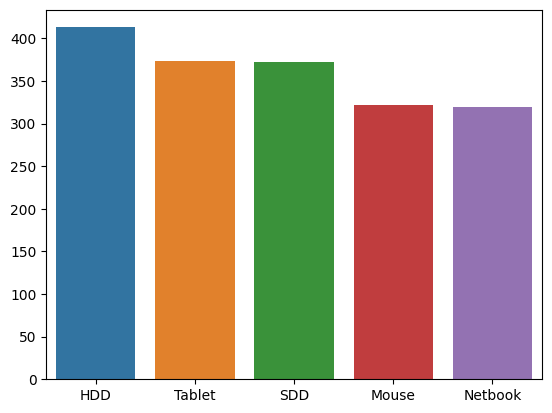

In [ ]:
#  GRAPHICAL SOLUTION / RESOLUCIÓN GRÁFICA

xs = ['HDD', 'Tablet', 'SDD', 'Mouse', 'Netbook']
ys = [413, 374, 372, 322, 320]

sns.barplot(x=xs, y=ys)

plt.xticks(rotation='horizontal') # 'vertical'
plt.show()

<h3>2. Which item generated the highest revenue for us? / ¿Qué artículo es el que más ingresos nos proporcionó?</h3>

In [ ]:
# ANALYTICAL SOLUTION / RESOLUCIÓN ANALÍTICA
df2 = my_df.groupby(by='article_name').sum().sort_values('total_amount', ascending=False).head(5)
pd.options.display.float_format= '$ {:,.2f}'.format
print(df2['total_amount'])

print()
print(df2.reset_index())

article_name
Full Pc      $ 538,335.93
Notebook     $ 251,000.00
Smartphone   $ 152,250.00
Chair         $ 69,477.48
Tablet        $ 48,620.00
Name: total_amount, dtype: float64

  article_name  week  quantity  total_amount
0      Full Pc    70       253  $ 538,335.93
1     Notebook    69       251  $ 251,000.00
2   Smartphone    74       290  $ 152,250.00
3        Chair    56       207   $ 69,477.48
4       Tablet    90       374   $ 48,620.00


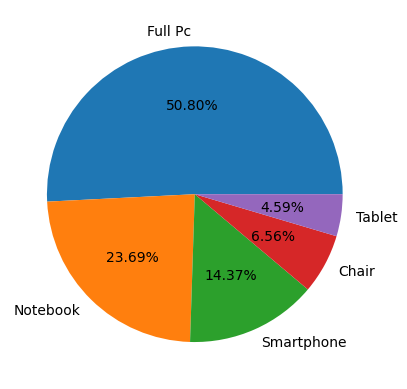

In [ ]:
# GRAPHICAL SOLUTION / RESOLUCIÓN GRÁFICA
plt.pie(x=df2['total_amount'], labels=df2.index, autopct='%1.2f%%')
plt.show()

<h3>3. To which vendor should the "Salesperson of the Month" bonus be awarded? / ¿A qué vendedor debe otorgarse el bono por "Mejor vendedor del mes"?</h3>

In [ ]:
# ANALYTICAL SOLUTION / RESOLUCIÓN ANALÍTICA
df4 = my_df.groupby(by='seller_name').sum().sort_values('total_amount', ascending=False)
pd.options.display.float_format= '$ {:,.2f}'.format
print(df4[['quantity'] + ['total_amount']].head(5))



                   quantity  total_amount
seller_name                              
Janel O'Curran          703  $ 192,832.47
Brockie Patience        441  $ 142,709.88
Oliviero Charkham       555  $ 141,329.76
Vasily Danilyuk         521  $ 129,157.55
Daisie Slograve         554  $ 120,520.11


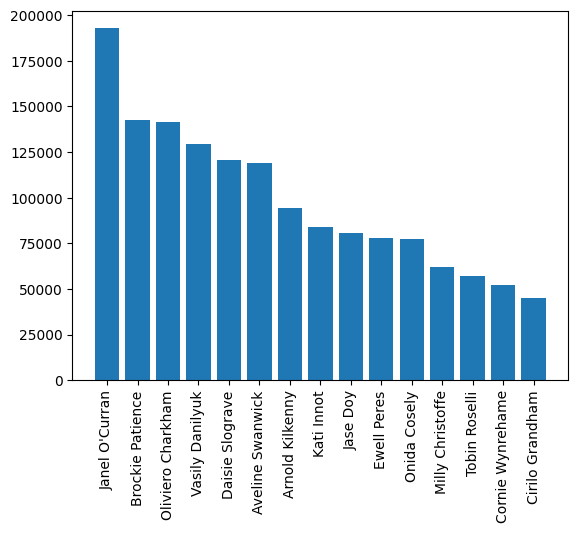

In [ ]:
# GRAPHICAL SOLUTION / RESOLUCIÓN GRÁFICA
plt.bar(df4.index, df4['total_amount'])
plt.xticks(rotation=90)
plt.show()

<h3>4. Are there significant variations in sales throughout the month? / ¿Hay grandes variaciones en ventas a lo largo del mes?</h3>
<h4>If so, when should I launch a promotional campaign? Si es así, ¿en qué momento debería lanzar una campaña de promociones?</h4>


In [ ]:
# ANALYTICAL SOLUTION  / RESOLUCIÓN ANALÍTICA
df5 = my_df.groupby(by='week').sum().sort_values('total_amount', ascending=False)
pd.options.display.float_format= '$ {:,.2f}'.format
print(df5[['quantity'] + ['total_amount']])

# 'week' es el index


      quantity  total_amount
week                        
1         2449  $ 507,458.81
2         2444  $ 415,364.44
3         2114  $ 329,140.03
4         1058  $ 223,844.56


[1 2 3 4] [507458.81 415364.44 329140.03 223844.56]


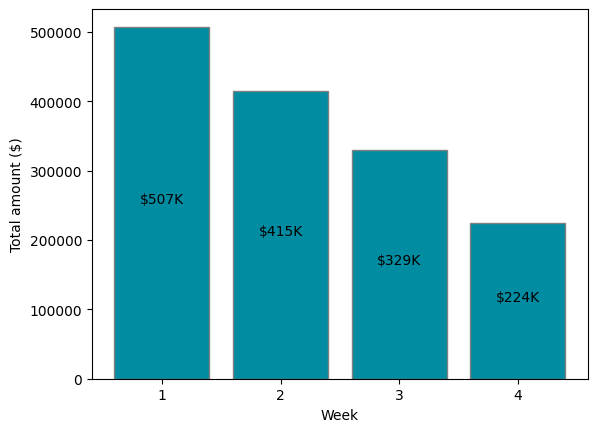

In [ ]:
# GRAPHICAL SOLUTION / RESOLUCIÓN GRÁFICA

fig = plt.figure()
ax = fig.add_subplot()
plt.bar(df5.index, df5['total_amount'], color='#028CA1', edgecolor='gray') #edgecolor es el color del borde de las barras.
ax.xaxis.set_major_locator(tick.MultipleLocator(1)) # Librería tick.
# Esto significa que habrá una marca mayor para cada unidad en el eje x
# Para que NO sea 0, 0.5, 1, 1.5 sino 0, 1, 2.

def addlabels(x, y):
    print(x, y)
    for i in range(len(x)):
        etiqueta = '$' + str(round(int(y[i])/1000)) + 'K'
        plt.text(i + 1, y[i]//2, s=etiqueta, ha='center') # ho = horizontal alignment; //2 = en la mitad de la barra. s = stick.


addlabels(df5.index.values, df5['total_amount'].values)

plt.xlabel('Week')
plt.ylabel('Total amount ($)')
plt.show()
# 'week' es el index

<h2>Tareas a realizar</h2>
<ul>
<li>Pensar 3 preguntas y responderlas con el método que consideres más apropiado. Al menos una de ellas debe contener la columna 'country_name' y al menos una de ellas debe buscar correlación entre dos variables categóricas.</li>
<li>Personalizar, estilar y dar contexto a las gráficas.</li>
<li>Generar un informe en el que se responda en forma coloquial a las preguntas, agregando conclusiones y consejos que puedan surgir de este trabajo. Se pueden agregar imágenes.</li>
<li>Publicar el trabajo <a href="https://youtu.be/FCQRhs4dxls">https://youtu.be/FCQRhs4dxls</a></li>
</ul>

<h3>5. Compare Argentina and Brazil: What is the best-selling product in terms of quantity? / Comparar Argentina y Brasil: ¿Cuál es el producto que más se vende, en qué cantidad?</h3>

In [ ]:

df_comparativo = my_df[(my_df['country_name'] == 'Brazil') | (my_df['country_name'] == 'Argentina')]

df_grouped = df_comparativo.groupby(['article_name', 'country_name']).agg({'quantity': 'sum'}).sort_values('quantity', ascending=False).reset_index()

df_top_products = df_grouped.groupby('country_name').head(1)

# Imprimir los resultados
for index, column in df_top_products.iterrows():
    print("Country:", column['country_name'])
    print("Best-selling product:", column['article_name'])
    print("Quantity sold:", column['quantity'])
    print("-----------------------------------")



Country: Brazil
Best-selling product: Tablet
Quantity sold: 156
-----------------------------------
Country: Argentina
Best-selling product: CPU
Quantity sold: 104
-----------------------------------


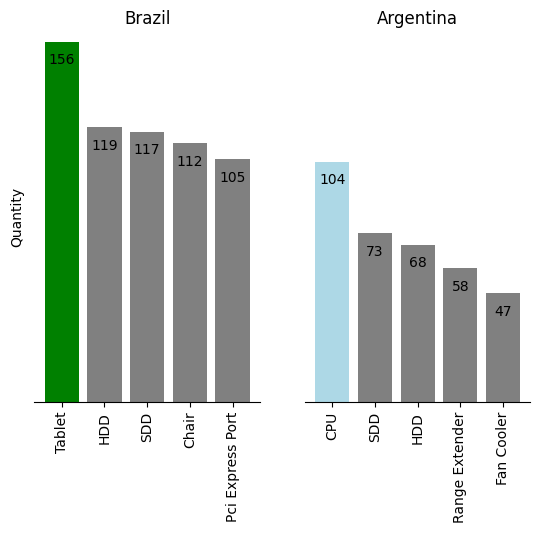

In [ ]:
df_B = my_df[my_df['country_name'] == 'Brazil'].groupby(['article_name', 'country_name']).agg({'quantity': 'sum'}).sort_values('quantity', ascending=False).head().reset_index()
df_B
df_A = my_df[my_df['country_name'] == 'Argentina'].groupby(['article_name', 'country_name']).agg({'quantity': 'sum'}).sort_values('quantity', ascending=False).head().reset_index()
df_A

plt.subplot(1,2, 1)
plt.bar(df_B['article_name'], df_B['quantity'], color=['green' if i == df_B['article_name'].index[0] else 'grey' for i in df_B['article_name'].index])
plt.title('Brazil')
plt.ylabel('Quantity')
plt.xticks(rotation='vertical')
plt.yticks([]) # No muestra etiqueta Eje y
plt.gca().spines['bottom'].set_visible(True) # Borde inferior del gráfico no sea visible
plt.gca().spines[['left','top','right']].set_visible(False)
plt.ylim(0, 160)
##################################
cantidad = df_B['quantity'].values #saca un vector y no una tabla.
productos = df_B['article_name'].values

for i in range(len(productos)):
    etiqueta = str(int(cantidad[i]))
    plt.text( s=etiqueta, x= productos[i] ,y= cantidad[i] - 5, ha='center', va='top') # vertical alignment bottom y top con coordenadas inferior y superior.



plt.subplot(1, 2, 2)
plt.bar(df_A['article_name'], df_A['quantity'], color=['lightblue' if i == df_A['article_name'].index[0] else 'grey' for i in df_A['article_name'].index])
plt.title('Argentina')
# plt.ylabel('Quantity')
plt.xticks(rotation='vertical')
plt.yticks([]) # No muestra etiqueta Eje y
plt.gca().spines['bottom'].set_visible(True) # Borde inferior del gráfico no sea visible
plt.gca().spines[['left','top','right']].set_visible(False)
plt.ylim(0, 160)

cantidad = df_A['quantity'].values
productos = df_A['article_name'].values

for i in range(len(productos)):
    etiqueta = str(int(cantidad[i]))
    plt.text( s=etiqueta, x= productos[i] ,y= cantidad[i] - 5, ha='center', va='top') # vertical alignment bottom y top con coordenadas inferior y superior.

plt.show()

<h3>6. Sales Evolution by Product: Argentina vs. Brazil / Evolución de Ventas por producto: Argentina vs. Brasil.</h3>

In [ ]:
df_evol = my_df.groupby(['article_name', 'country_name', 'week']).sum().reset_index()
df_evol

print('Sales Evolution by product.\n')
print(df_evol[['article_name'] + ['country_name'] + ['week'] + ['quantity'] + ['total_amount']])



Sales Evolution by product.

    article_name country_name  week  quantity  total_amount
0            CPU    Argentina     1        16    $ 2,233.92
1            CPU    Argentina     2        25    $ 3,490.50
2            CPU    Argentina     3        37    $ 5,165.94
3            CPU    Argentina     4        26    $ 3,630.12
4            CPU       Brazil     1        27    $ 3,769.74
..           ...          ...   ...       ...           ...
602   Wi-Fi Card       Mexico     2        17    $ 1,013.37
603   Wi-Fi Card       Mexico     3         9      $ 536.49
604   Wi-Fi Card       Mexico     4         7      $ 417.27
605   Wi-Fi Card         Peru     1        12      $ 715.32
606   Wi-Fi Card         Peru     3        15      $ 894.15

[607 rows x 5 columns]


[(0.0, 0.5019607843137255, 0.0), (0.0, 0.20078431372549022, 0.0), (0.13568627450980394, 0.16941176470588237, 0.18039215686274512), (0.5427450980392158, 0.6776470588235295, 0.7215686274509805), (0.6392156862745099, 0.508235294117647, 0.8721568627450981), (0.5803921568627451, 0.0, 0.8274509803921568)]


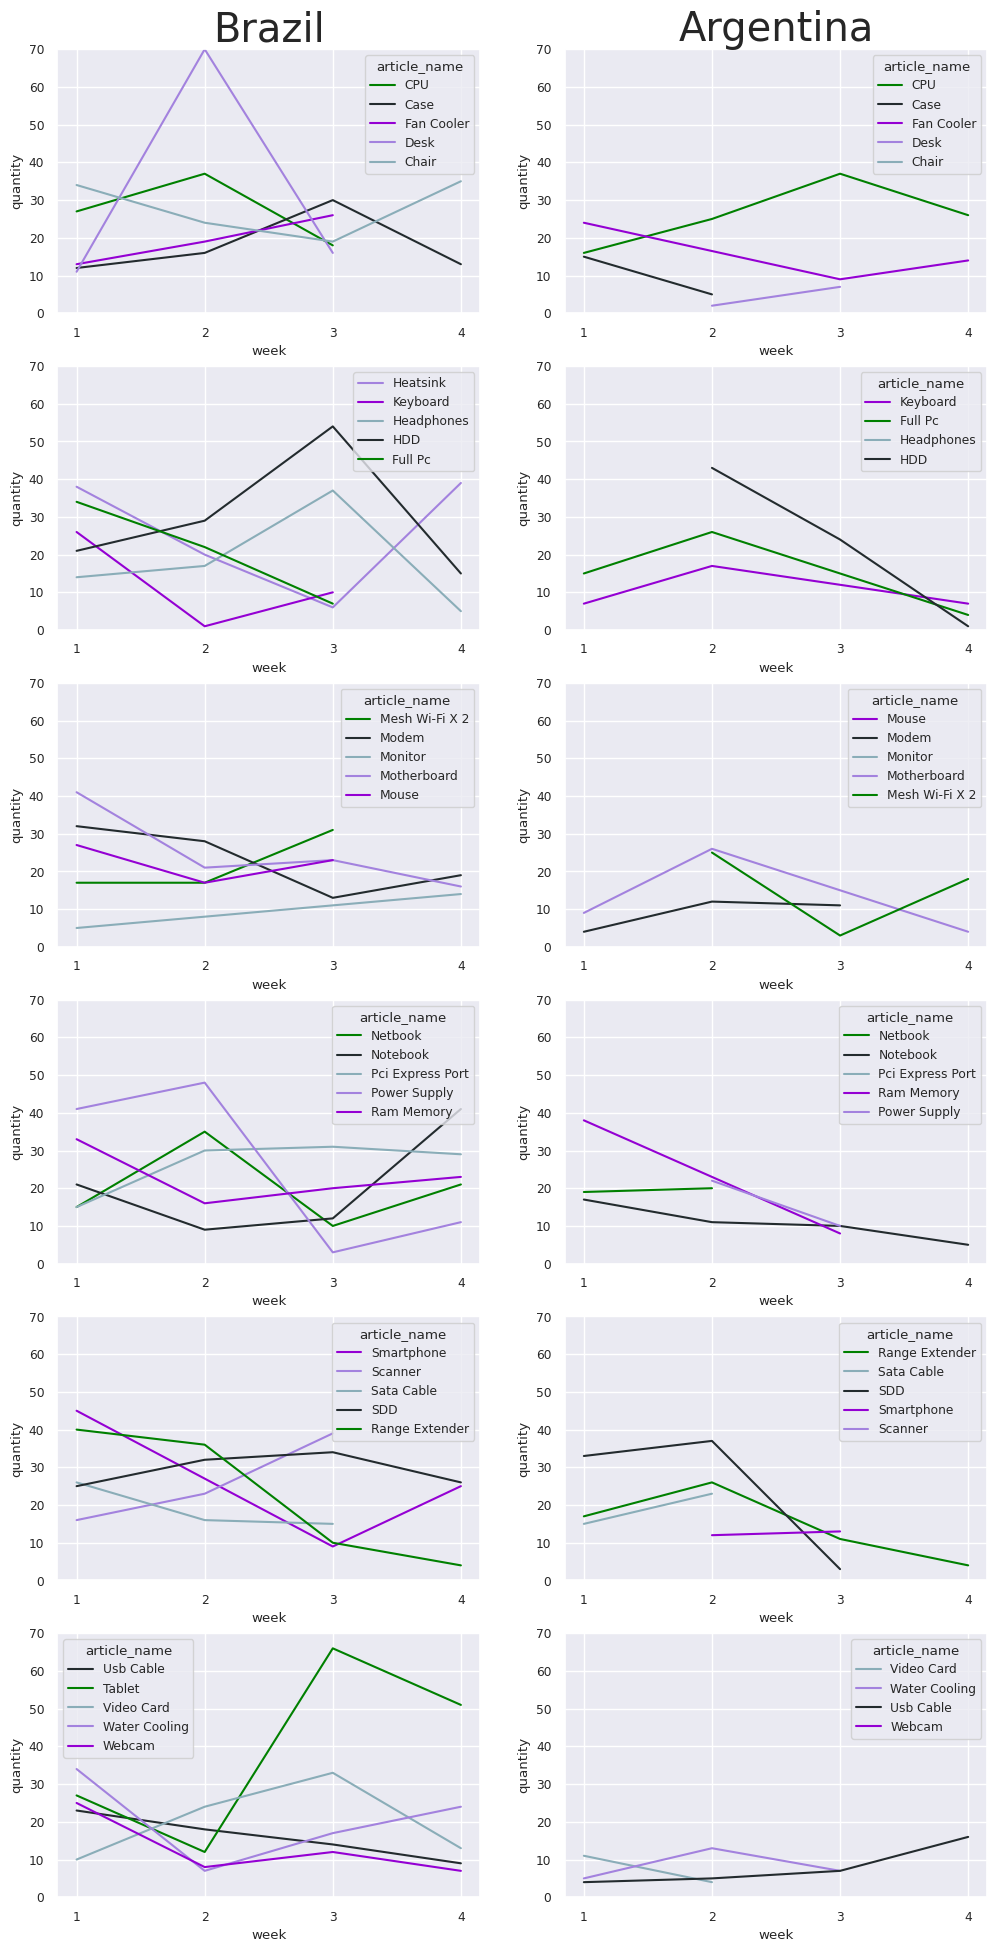

In [ ]:
df_evolB = df_evol[(df_evol['country_name'] == 'Brazil')].groupby(['article_name','week', 'country_name']).sum().sort_values('article_name').reset_index()
df_evolA = df_evol[(df_evol['country_name'] == 'Argentina')].groupby(['article_name', 'week', 'country_name']).sum().sort_values('article_name').reset_index()

# Mapear los valores de la columna 'week' a etiquetas personalizadas
from collections import OrderedDict
week_labels = OrderedDict({1: '1', 2: '2', 3: '3', 4: '4'})

df_evolB = df_evolB.sort_values('week').reset_index()
df_evolA = df_evolA.sort_values('week').reset_index()

df_evolB['week'] = df_evolB['week'].map(week_labels)
df_evolA['week'] = df_evolA['week'].map(week_labels)

palette0 = sns.blend_palette(['green', 'black', 'lightblue', 'darkviolet'], 6)
print(palette0) # Me da las tuplas que representan los colores
palette_inicial = [(0.0, 0.5019607843137255, 0.0), (0.13568627450980394, 0.16941176470588237, 0.18039215686274512), (0.5427450980392158, 0.6776470588235295, 0.7215686274509805), (0.6392156862745099, 0.508235294117647, 0.8721568627450981), (0.5803921568627451, 0.0, 0.8274509803921568)]

# # Valores de 'article_name' para los que se trazarán líneas
selected_articles1 = ['CPU', 'Case', 'Chair', 'Desk', 'Fan Cooler']
selected_articles2 = ['Full Pc', 'HDD', 'Headphones', 'Heatsink', 'Keyboard']
selected_articles3 = ['Mesh Wi-Fi X 2', 'Modem', 'Monitor', 'Motherboard','Mouse']
selected_articles4 = ['Netbook', 'Notebook', 'Pci Express Port', 'Power Supply','Ram Memory']
selected_articles5 = ['Range Extender', 'SDD', 'Sata Cable', 'Scanner', 'Smartphone']
selected_articles6 = ['Tablet', 'Usb Cable', 'Video Card', 'Water Cooling', 'Webcam']

list_s = [selected_articles1, selected_articles2, selected_articles3, selected_articles4, selected_articles5, selected_articles6]

palette = {'Wi-Fi Card': (0.0, 0.20078431372549022, 0.0)}

for i in range(len(list_s)):
	for j in range(len(palette_inicial)):
		palette[list_s[i][j]] = palette_inicial[j]


# Configurar el tamaño de la figura
plt.figure(figsize=(12, 24))

# Configurar el tamaño de la fuente de las leyendas
sns.set(font_scale=0.8)

plt.subplot(6, 2, 1)
# # Filtrar el DataFrame df_evol1 solo para los valores seleccionados de 'article_name'
df_selected_articles1B = df_evolB[df_evolB['article_name'].isin(selected_articles1)]
sns.lineplot(data = df_selected_articles1B, x='week', y='quantity', hue='article_name',palette = palette, markers=True, errorbar = None)
plt.ylim(0, 70)
plt.title('Brazil', fontsize=3 * plt.rcParams['axes.titlesize'])

plt.subplot(6, 2, 2)
# # Filtrar el DataFrame df_evol1 solo para los valores seleccionados de 'article_name'
df_selected_articles1A = df_evolA[df_evolA['article_name'].isin(selected_articles1)]
sns.lineplot(data = df_selected_articles1A, x='week', y='quantity', hue='article_name',palette = palette, markers=True, errorbar = None)
plt.ylim(0, 70)
plt.title('Argentina', fontsize=3 * plt.rcParams['axes.titlesize'])


plt.subplot(6, 2, 3)
df_selected_articles2B = df_evolB[df_evolB['article_name'].isin(selected_articles2)]
sns.lineplot(data = df_selected_articles2B, x='week', y='quantity', hue='article_name',palette = palette, markers=True, errorbar = None)
plt.ylim(0, 70)
plt.legend(loc='upper right') #Podría poner 1 En contra agujs del reloj.

plt.subplot(6, 2, 4)
df_selected_articles2A = df_evolA[df_evolA['article_name'].isin(selected_articles2)]
sns.lineplot(data = df_selected_articles2A, x='week', y='quantity', hue='article_name',palette = palette, markers=True, errorbar = None)
plt.ylim(0, 70)

plt.subplot(6, 2, 5)
df_selected_articles3B = df_evolB[df_evolB['article_name'].isin(selected_articles3)]
sns.lineplot(data = df_selected_articles3B, x='week', y='quantity', hue='article_name',palette = palette, markers=True, errorbar = None)
plt.ylim(0, 70)

plt.subplot(6, 2, 6)
df_selected_articles3A = df_evolA[df_evolA['article_name'].isin(selected_articles3)]
sns.lineplot(data = df_selected_articles3A, x='week', y='quantity', hue='article_name',palette = palette, markers=True, errorbar = None)
plt.ylim(0, 70)

plt.subplot(6, 2, 7)
df_selected_articles4B = df_evolB[df_evolB['article_name'].isin(selected_articles4)]
sns.lineplot(data = df_selected_articles4B, x='week', y='quantity', hue='article_name',palette = palette, markers=True, errorbar = None)
plt.ylim(0, 70)

plt.subplot(6, 2, 8)
df_selected_articles4A = df_evolA[df_evolA['article_name'].isin(selected_articles4)]
sns.lineplot(data = df_selected_articles4A, x='week', y='quantity', hue='article_name',palette = palette, markers=True, errorbar = None)
plt.ylim(0, 70)

plt.subplot(6, 2, 9)
df_selected_articles5B = df_evolB[df_evolB['article_name'].isin(selected_articles5)]
sns.lineplot(data = df_selected_articles5B, x='week', y='quantity', hue='article_name',palette = palette, markers=True, errorbar = None)
plt.ylim(0, 70)

plt.subplot(6, 2, 10)
df_selected_articles5A = df_evolA[df_evolA['article_name'].isin(selected_articles5)]
sns.lineplot(data = df_selected_articles5A, x='week', y='quantity', hue='article_name',palette = palette, markers=True, errorbar = None)
plt.ylim(0, 70)

plt.subplot(6, 2, 11)
df_selected_articles6B = df_evolB[df_evolB['article_name'].isin(selected_articles6)]
sns.lineplot(data = df_selected_articles6B, x='week', y='quantity', hue='article_name',palette = palette, markers=True, errorbar = None)
plt.ylim(0, 70)

plt.subplot(6, 2, 12)
df_selected_articles6A = df_evolA[df_evolA['article_name'].isin(selected_articles6)]
sns.lineplot(data = df_selected_articles6A, x='week', y='quantity', hue='article_name',palette = palette, markers=True, errorbar = None)
plt.ylim(0, 70)



plt.show()

<h3>7. What are the top five best-selling products and the top five revenue-generating products? / ¿Cuáles son los cinco productos más vendidos y cuáles los cinco que generan más ingresos? </h3>

In [ ]:

df_quantity = my_df.groupby('article_name').sum().sort_values('quantity', ascending = False).head()
df_quantity
print(f'The top five best-selling products are: {", ".join(df_quantity.index)}\n')

df_total_amount = my_df.groupby('article_name').sum().sort_values('total_amount', ascending = False).head()
df_total_amount
print(f'The top five revenue-generating products are: {", ".join(df_total_amount.index)}\n')


The top five best-selling products are: HDD, Tablet, SDD, Mouse, Netbook

The top five revenue-generating products are: Full Pc, Notebook, Smartphone, Chair, Tablet



  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for matplotlib_venn: filename=matplotlib_venn-0.11.9-py3-none-any.whl size=32999 sha256=d7e48e9eb514bc6a490bbe9d3873040413f62bbc7224c554cc1da92fb90f124e
  Stored in directory: /root/.cache/pip/wheels/25/de/d4/29dfc5d4520b956df7bc54a8464ad053042918bc525e88bf66
Successfully built matplotlib_venn

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


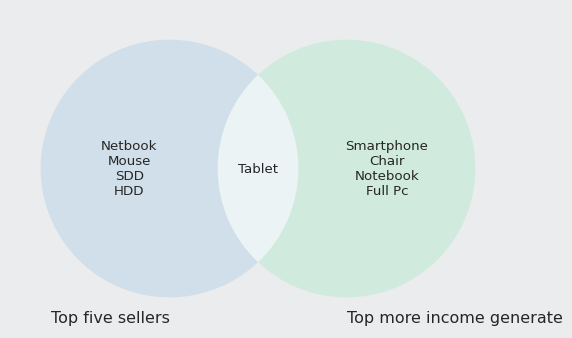

In [ ]:
!pip install matplotlib_venn
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Conjuntos de elementos
set1 = set(df_quantity.index)
set2 = set(df_total_amount.index)

# Elementos exclusivos del primer conjunto
set1_only = set1 - set2

# Elementos comunes a ambos conjuntos
intersection = set1.intersection(set2)

# Elementos exclusivos del segundo conjunto
set2_only = set2 - set1

# Crear el diagrama de Venn
venn = venn2([set1, set2], set_labels=('Top five sellers', 'Top more income generate'), set_colors=('#A9CCE3', '#ABEBC6'))

# Agregar etiquetas a las áreas de intersección
venn.get_label_by_id('10').set_text('\n'.join(set1_only))
venn.get_label_by_id('01').set_text('\n'.join(set2_only))
venn.get_label_by_id('11').set_text('\n'.join(intersection))

# Establecer el color de fondo
fig = plt.gcf()
fig.set_facecolor('#EAECEE')
# Mostrar el diagrama
plt.show()


### 8. Do the average weekly Brazilian sales still align with the global weekly average? / ¿Siguen las ventas semanales brasileras promedio  a la media mundial semanal?

In [ ]:
World_average_sales = []
Brazilian_average_sales = []

pd.options.display.float_format= '$ {:,.2f}'.format

for i in range(4):
     w = my_df[my_df['week'] == i+1]['total_amount'].mean(axis = 0)
     World_average_sales.append(w)
     print(f'Average global sales week {i+1}: $ {w:.2f}.', end='\t')
     b = my_df[(my_df['week'] == i+1) & (my_df['country_name'] == 'Brazil')]['total_amount'].mean(axis = 0)
     Brazilian_average_sales.append(b)
     print(f'\nAverage Brazilian sales week {i+1}: $ {b:.2f}.\n')

Average global sales week 1: $ 1702.88.	
Average Brazilian sales week 1: $ 1758.40.

Average global sales week 2: $ 1339.89.	
Average Brazilian sales week 2: $ 1200.04.

Average global sales week 3: $ 1256.26.	
Average Brazilian sales week 3: $ 955.92.

Average global sales week 4: $ 1721.88.	
Average Brazilian sales week 4: $ 1833.40.



/tmp/ipykernel_86/4139821833.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(week_list, World_average_sales, 'r-', label='World average sales', color = 'blue')


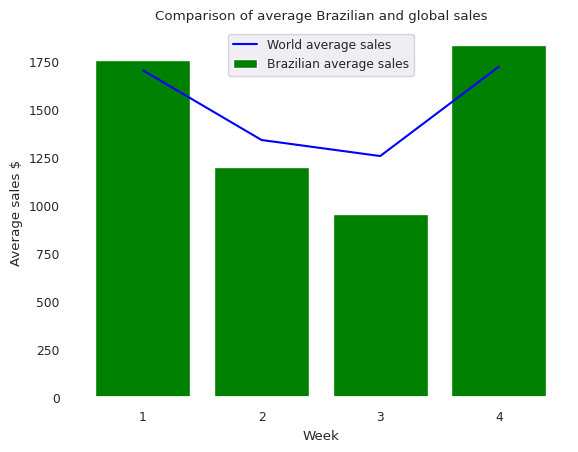

In [ ]:
# Datos de ventas promedio
week_list = [1, 2, 3, 4]

# Configurar el gráfico
fig, ax = plt.subplots()

ax.set_facecolor('white')

ax.bar(week_list, Brazilian_average_sales, label='Brazilian average sales', color = 'green')
ax.plot(week_list, World_average_sales, 'r-', label='World average sales', color = 'blue')

# Etiquetas de los ejes y título del gráfico
ax.set_xlabel('Week')
ax.set_ylabel('Average sales $')
ax.set_title('Comparison of average Brazilian and global sales')

# Leyenda
ax.legend()
ax.xaxis.set_major_locator(tick.MultipleLocator(1))
# Mostrar el gráfico
plt.show()


<h2>Conclusiones y propuestas</h2>

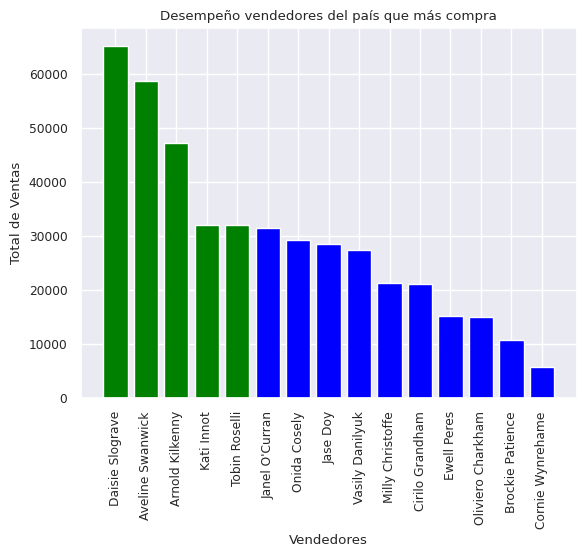

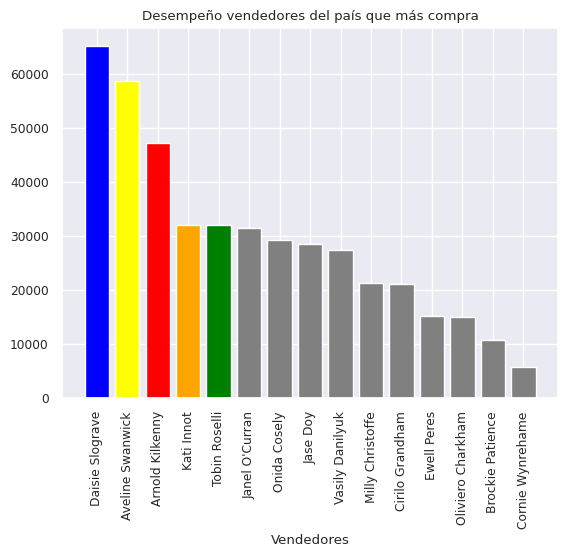

In [ ]:
# Resolucion Analitica
df6 = my_df[my_df['country_name'] == 'Brazil']
vendedores_pais = df6.groupby('seller_name').sum().sort_values('total_amount', ascending=False)
vendedores_pais.head()


# Opción Original

plt.bar(vendedores_pais.index,vendedores_pais['total_amount'], 
    color = ['green' if x in vendedores_pais.index[0:5] else 'blue' for x in vendedores_pais.index]) #Color verde para los mejores 5
plt.xticks(rotation = 90)
plt.title("Desempeño vendedores del país que más compra")
plt.xlabel("Vendedores")
plt.ylabel("Total de Ventas")
plt.show()

# Segunda Opción 

x = np.arange(15)

c = []
for values in x:
    if values == 0:
        c.append('blue')
    elif values == 1:
        c.append('yellow')
    elif values == 2:
        c.append('red')
    elif values == 3:
        c.append('orange')
    elif values == 4:
        c.append('green') 
    else:
        c.append('gray')

# print(c)

vendedores_pais.reset_index(inplace=True)

plt.bar(vendedores_pais['seller_name'],vendedores_pais['total_amount'], 
#     color = ['green' if x in vendedores_pais.index[0:5] else 'blue' for x in vendedores_pais.index]
# color= ["red" if x in vendedores_pais.index[0:1] else "lightgreen" if x in vendedores_pais.index[1:3] else "lightgray" for x in vendedores_pais.index])
    color = c) #Color verde para los mejores 5
plt.xticks(rotation = 90)
plt.title("Desempeño vendedores del país que más compra")
plt.xlabel("Vendedores")
# plt.ylabel("Total de Ventas")
plt.show()

                   total_amount  quantity
seller_name                              
Daisie Slograve     $ 65,283.28       226
Aveline Swanwick    $ 58,771.48       227
Arnold Kilkenny     $ 47,243.54       184
Kati Innot          $ 32,087.32       151
Tobin Roselli       $ 31,997.93       211
Janel O'Curran      $ 31,562.86       182
Onida Cosely        $ 29,354.31       206
Jase Doy            $ 28,493.25       149
Vasily Danilyuk     $ 27,495.77       124
Milly Christoffe    $ 21,247.38       161
Cirilo Grandham     $ 21,061.74       158
Ewell Peres         $ 15,253.22        91
Oliviero Charkham   $ 14,951.72       195
Brockie Patience    $ 10,756.96       125
Cornie Wynrehame     $ 5,711.09       125

                   total_amount
seller_name                    
Daisie Slograve     $ 65,283.28
Aveline Swanwick    $ 58,771.48
Arnold Kilkenny     $ 47,243.54
Kati Innot          $ 32,087.32
Tobin Roselli       $ 31,997.93
Janel O'Curran      $ 31,562.86
Onida Cosely        $ 29,354.

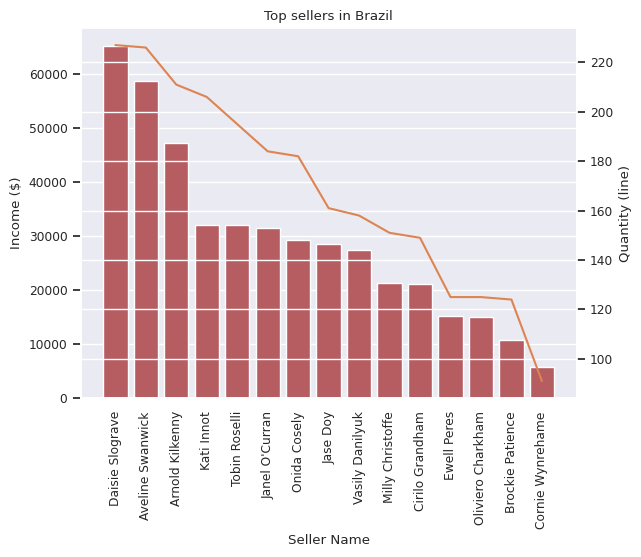

In [ ]:
df_brazil = my_df[my_df['country_name'] == 'Brazil']

print(df_brazil[['seller_name','total_amount', 'quantity']].groupby('seller_name').sum().sort_values('total_amount', ascending=False))

print()
df_brazil_bars = df_brazil[['seller_name','total_amount']].groupby('seller_name').sum('total_amount').sort_values('total_amount', ascending=False)
print(df_brazil_bars)
print()
df_brazil_line = df_brazil[['seller_name','quantity']].groupby('seller_name').sum('quantity').sort_values('quantity', ascending=False).reset_index()
print(df_brazil_line)

fig, ax1 = plt.subplots()
# ax1: axes1

# sns.barplot(data = df_brazil_bars, x='seller_name', y='total_amount', ax=ax1,  color='C3')
sns.barplot(data = df_brazil_bars, x = df_brazil_bars.index, y='total_amount', ax=ax1,  color='C3')
# ax: axes
plt.xticks(rotation=90)
ax2 = ax1.twinx() # Permites usar ambos ejes
# ax2: axes2 = ax1.twinx()

sns.lineplot(data = df_brazil_line, x='seller_name', y='quantity', ax=ax2, color='C11')

plt.xticks(rotation=90)
plt.title('Top sellers in Brazil')

ax1.set_xlabel("Seller Name")

ax1.set_ylabel("Income ($)")
ax2.set_ylabel("Quantity (line)")

plt.show()

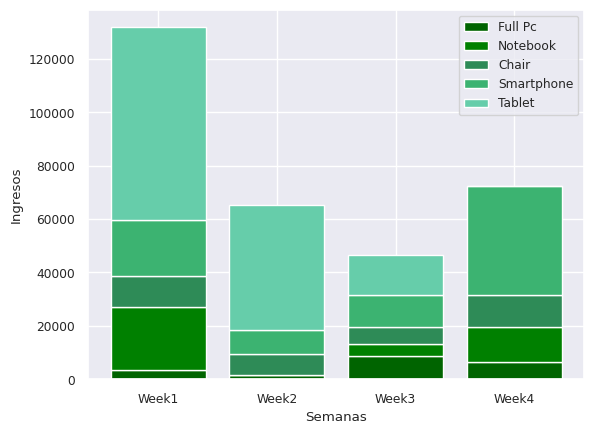

In [ ]:
x1=['Week1', 'Week2', 'Week3', 'Week4']
L1=['Full Pc', 'Notebook','Chair', 'Smartphone', 'Tablet'] 

y1=np.array([72346, 46812, 14895, 0])
y2=np.array([21000, 9000, 12000, 41000])
y3=np.array([11412, 8055, 6377, 11747])
y4=np.array([23625, 0, 4725, 13125])
y5=np.array([3510, 1560, 8580, 6630])

plt.bar(x1,y5,color='darkgreen')
plt.bar(x1,y4, bottom=y5, color='green')
plt.bar(x1,y3, bottom=y5+y4, color='seagreen')
plt.bar(x1,y2,bottom=y5+y4+y3, color='mediumseagreen')
plt.bar(x1,y1, bottom=y5+y4+y3+y2, color='mediumaquamarine')

plt.xlabel('Semanas')
plt.ylabel('Ingresos')

plt.legend(L1)
plt.show()

                   quantity  total_amount
seller_name                              
Janel O'Curran          703  $ 192,832.47
Brockie Patience        441  $ 142,709.88
Oliviero Charkham       555  $ 141,329.76
Vasily Danilyuk         521  $ 129,157.55
Daisie Slograve         554  $ 120,520.11


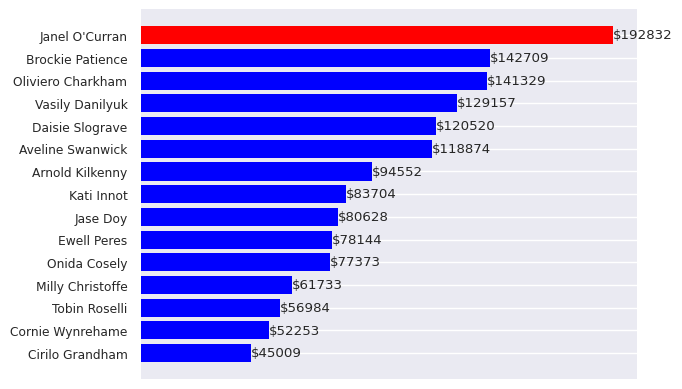

In [ ]:
df4 = my_df.groupby(by='seller_name').sum().sort_values('total_amount', ascending=False)
pd.options.display.float_format = '$ {:,.2f}'.format
print(df4[['quantity'] + ['total_amount']].head(5))

plt.barh(df4.index, df4['total_amount'], align='center', color = ['red' if x in df4.index[0] else 'blue' for x in df4.index], edgecolor='none')

vendedores = df4.index
cantidad = df4['total_amount'].values

for i in range(len(vendedores)):
    etiqueta = '$' + str(int(cantidad[i]))
    plt.text( s=etiqueta, x=cantidad[i] ,y=vendedores[i], ha='left', va='center') # vertical alignment bottom y top con coordenadas inferior y superior.

plt.gca().spines['bottom'].set_visible(False) # Borde inferior del gráfico no sea visible
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().invert_yaxis() # se invierte el eje 'y', y los valores aumentan/disminuyen de arriba hacia abajo.
# es ascending true ascending false en definitiva.
plt.xlabel('') # Nombre del Eje x es una cadena vacía
plt.xticks([]) # No muestra etiqueta Eje x
plt.ylabel('') # Nombre del Eje y es una cadena vacía

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=72e6d457-a662-4ecb-9372-7bc53df76810' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>